# Training to Spot Fake News
## Research Question
Is training developed to innoculate people against fake news effective? We ran an experiment that tested two training methods designed to help people spot fake news.
## Method
Partipcants were randomly assigned to one of three conditions. Participants in the first condition played the [Bad News Game](https://getbadnews.com/#intro) designed to "vaccinate the world against disinformation". Participants assigned to the second condition watched a [video](https://www.factcheck.org/2016/12/video-spotting-fake-news/) "How to Spot Fake News" cretaed by [factcheck.org](https://www.factcheck.org/). A third condition served as a control condition.

Participants were then asked to classify 20 articles into one of five categories: fake news, satire, extreme bias, political, or credible.  


## Load Libraries and Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

## Extract, Transform, Load 
Take original Qualtircs csv file, remove rejected subjects, complete transformations, save clean data .csv file

### Variable Description
ID: Subject ID (mTurk ID)

Cond: Assigned experimental condition. 
T1=Training Game, 
T2=Training video, 
C=Control(no training)

Sex: 1-Male; 2-Female; 3-Other/Prefer not to answer

Age: In years

Art01-Art20: For Article 1-20. Category assigned by participant to article
1- Satire: humor, irony, exaggeration, ridicule, and false information to comment on current events. 
2- Fake News: fabricate information, disseminate deceptive content/grossly distort actual news reports
3- Extreme Bias: may rely on propaganda, decontextualized info, opinions distorted as facts  
4- Political: generally verifiable info in support of certain points of view/political orientations
5- Credible: consistent with traditional and ethical practices in journalism

Cor01-Cor20: For Article 1-20. '1' if assigned correctly, '0' incorrect as assigned by subject 

TotCor: Total correct out of 20 articles classified. 

In [155]:
# Read in original Qualtrics .csv file.
df_raw = pd.read_csv('data/Spot Fake News_July 28, 2019_13.40.csv', skiprows=[1,2])

In [156]:
# Remove rejected responses from data
df_raw = df_raw[df_raw.Consent != 2] # Take out surveys where participant did not consent
df_raw = df_raw[df_raw.Finished != 0] # Take out incomplete surveys
df_raw = df_raw[df_raw.mTurkID != 'asd'] # Non-sensical text responses/incorrect completion code
df_raw = df_raw[df_raw.mTurkID != 'A1TXOZQU1O4F0N'] # Response not in mTurk
df_raw = df_raw[df_raw.mTurkID != 'A5LYLHG880ABE'] # Worker repeated survey
df_raw = df_raw[df_raw.mTurkID != 'AZM3H44W1D65P'] # Response not in mTurk
df_raw = df_raw[df_raw.mTurkID != 'A1YC558J4E5KZ'] # Worker repeated survey
df_raw = df_raw[df_raw.mTurkID != 'AK2C9AX5QJWUU'] # Incorrect completion code
df_raw = df_raw[df_raw.mTurkID != 'A110KENBXU7SUJ'] # Incorrect completion code
df_raw = df_raw[df_raw.mTurkID != 'AJ60KRY0FTB1F'] # Incorrect completion code

In [157]:
# Create data frame for cleaned data
col_names = ['ID','Cond','Sex','Age',\
             'Art01','Art02','Art03','Art04','Art05','Art06','Art07','Art08','Art09','Art10',\
             'Art11','Art12','Art13','Art14','Art15','Art16','Art17','Art18','Art19','Art20',\
             'Cor01','Cor02','Cor03','Cor04','Cor05','Cor06','Cor07','Cor08','Cor09','Cor10',\
             'Cor11','Cor12','Cor13','Cor14','Cor15','Cor16','Cor17','Cor18','Cor19','Cor20','TotCor']
df_clean = pd.DataFrame(columns=col_names)

In [158]:
# Transfer Demographic variables
df_clean.ID = df_raw.mTurkID
df_clean.Cond = df_raw.Condition
df_clean.Sex = df_raw.sex
df_clean.Age = df_raw.age_1_TEXT
df_clean.at[130, 'Age'] = 27 # Correct original entry of '1992' to '27'
df_clean.at[188, 'Age'] = 25 # Convert original entry of '1994' to '25'

In [159]:
# Create variable for subject's choice of article categorization
df_clean.Art01 = df_raw.Article01
df_clean.Art02 = df_raw.Article02
df_clean.Art03 = df_raw.Article03
df_clean.Art04 = df_raw.Article04
df_clean.Art05 = df_raw.Article05
df_clean.Art06 = df_raw.Article06
df_clean.Art07 = df_raw.Article07
df_clean.Art08 = df_raw.Article08
df_clean.Art09 = df_raw.Article09
df_clean.Art10 = df_raw.Article10
df_clean.Art11 = df_raw.Article11
df_clean.Art12 = df_raw.Article12
df_clean.Art13 = df_raw.Article13
df_clean.Art14 = df_raw.Article14
df_clean.Art15 = df_raw.Article15
df_clean.Art16 = df_raw.Article16
df_clean.Art17 = df_raw.Article17
df_clean.Art18 = df_raw.Article18
df_clean.Art19 = df_raw.Article19
df_clean.Art20 = df_raw.Article20

In [160]:
# Create variable records if article coded correctly and Total number articles coded correctly
# 1: Correctly Coded. 0: Incorrectly Coded
df_clean.Cor01 = np.where(df_raw.Article01==2, 1, 0)
df_clean.Cor02 = np.where(df_raw.Article02==2, 1, 0)
df_clean.Cor03 = np.where(df_raw.Article03==2, 1, 0)
df_clean.Cor04 = np.where(df_raw.Article04==2, 1, 0)
df_clean.Cor05 = np.where(df_raw.Article05==2, 1, 0)
df_clean.Cor06 = np.where(df_raw.Article06==2, 1, 0)
df_clean.Cor07 = np.where(df_raw.Article07==2, 1, 0)
df_clean.Cor08 = np.where(df_raw.Article08==2, 1, 0)
df_clean.Cor09 = np.where(df_raw.Article09==1, 1, 0)
df_clean.Cor10 = np.where(df_raw.Article10==1, 1, 0)
df_clean.Cor11 = np.where(df_raw.Article11==1, 1, 0)
df_clean.Cor12 = np.where(df_raw.Article12==3, 1, 0)
df_clean.Cor13 = np.where(df_raw.Article13==3, 1, 0)
df_clean.Cor14 = np.where(df_raw.Article14==3, 1, 0)
df_clean.Cor15 = np.where(df_raw.Article15==4, 1, 0)
df_clean.Cor16 = np.where(df_raw.Article16==4, 1, 0)
df_clean.Cor17 = np.where(df_raw.Article17==4, 1, 0)
df_clean.Cor18 = np.where(df_raw.Article18==5, 1, 0)
df_clean.Cor19 = np.where(df_raw.Article19==5, 1, 0)
df_clean.Cor20 = np.where(df_raw.Article20==5, 1, 0)
df_clean.TotCor = df_clean.Cor01+df_clean.Cor02+df_clean.Cor03+df_clean.Cor04+df_clean.Cor05+\
    df_clean.Cor06+df_clean.Cor07+df_clean.Cor08+df_clean.Cor09+df_clean.Cor10+df_clean.Cor11+\
    df_clean.Cor12+df_clean.Cor13+df_clean.Cor14+df_clean.Cor15+df_clean.Cor16+df_clean.Cor17+\
   df_clean.Cor18+df_clean.Cor19+df_clean.Cor20

In [162]:
# Save clean data file to .csv
df_clean.to_csv("data/CleanExpData.csv")

## Hypothesis Test
Are training methods effective in helping people identify and classify fake , biased, and legitimate news?

H0: TotCor<sub>Control</sub> = TotCor<sub>T1</sub> = TotCor<sub>T2</sub>

H1: TotCor<sub>Control</sub> != TotCor<sub>T1</sub> != TotCor<sub>T2</sub>

In [167]:
# Load Data File
datafile = "data/CleanExpData"
data = pd.read_csv(datafile)

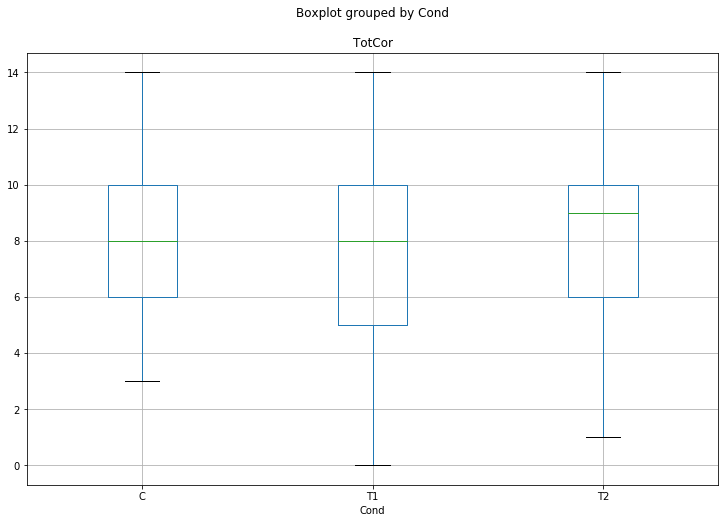

In [169]:
# Create Box Plot
data.boxplot('TotCor', by='Cond', figsize=(12,8))
ctrl = data['TotCor'][data.Cond == 'ctrl']
grps = pd.unique(data.Cond.values)
d_data = {grp:data['TotCor'][data.Cond == grp] for grp in grps}

#k = len(pd.unique(data.Cond))  # number of conditions
#N = len(data.values)  # conditions times participants
#n = data.groupby('Cond').size()[0] #Participants in each condition

## Exploratory Data Analysis

In [163]:
# Calculate means
print('Mean Accuracy rates')

Control_Check = df_clean['Cond'] =='C'
Control_Res = df_clean[Control_Check]
print('Control: ', Control_Res.mean())

T1_Check = df_clean['Cond'] =='T1'
T1_Res = df_clean[T1_Check] 
print('T1: ', T1_Res.mean())

T2_Check = df_clean['Cond'] =='T2'
T2_Res = df_clean[T2_Check] 
print('T2: ', T2_Res.mean())

Mean Accuracy rates
Control:  Sex        1.436170
Age       41.172043
Art01      3.340426
Art02      3.372340
Art03      2.680851
Art04      3.010638
Art05      3.340426
Art06      2.617021
Art07      2.595745
Art08      2.478723
Art09      1.457447
Art10      1.882979
Art11      1.946809
Art12      3.542553
Art13      3.446809
Art14      3.500000
Art15      3.297872
Art16      3.414894
Art17      3.351064
Art18      4.053191
Art19      3.989362
Art20      3.904255
Cor01      0.340426
Cor02      0.180851
Cor03      0.436170
Cor04      0.297872
Cor05      0.265957
Cor06      0.617021
Cor07      0.563830
Cor08      0.574468
Cor09      0.744681
Cor10      0.585106
Cor11      0.585106
Cor12      0.287234
Cor13      0.436170
Cor14      0.308511
Cor15      0.159574
Cor16      0.276596
Cor17      0.180851
Cor18      0.553191
Cor19      0.340426
Cor20      0.372340
TotCor     8.106383
dtype: float64
T1:  Sex        1.510417
Age       38.739583
Art01      3.364583
Art02      3.291667
Art03     